    0.Import Required Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


1. Load dataset 

In [6]:
df = pd.read_csv("Iris.csv")   # downloaded from Kaggle
print(df.head())

X = df.drop("Species", axis=1)
y = df["Species"]

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


2. Normalize features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Train/Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


4. KNN Classification and predictions

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


 5. Evaluation

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



6. Find Best K Value (1–20) with graph

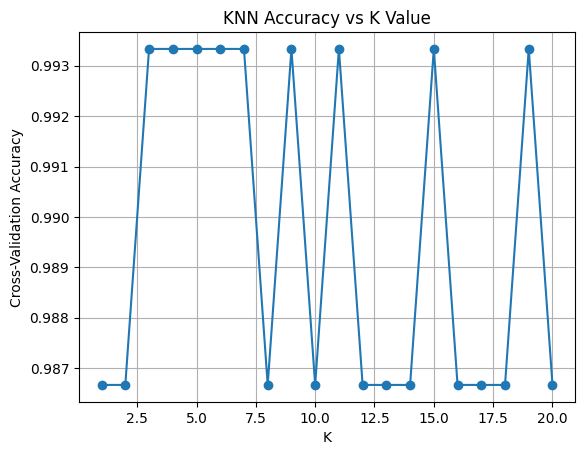

In [11]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)
    accuracies.append(cv_scores.mean())

plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Cross-Validation Accuracy")
plt.grid()
plt.show()

7. Decision Boundary Visualization (using only two features)


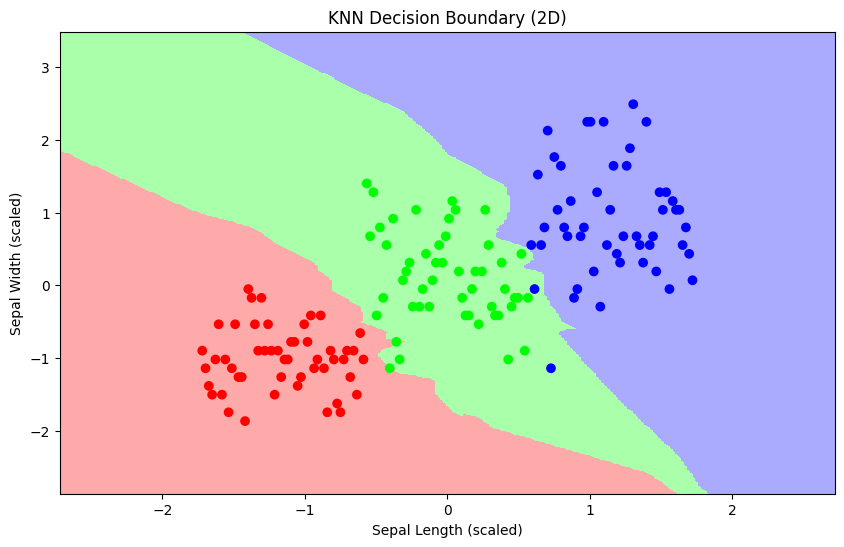

In [13]:
from matplotlib.colors import ListedColormap

# Use only 2 features for boundary plot
X_plot = X_scaled[:, :2]  # sepal length & width

# Convert labels to numeric codes
y_numeric = pd.Categorical(y).codes

# Train KNN with numeric targets
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_plot, y_numeric)

# Create meshgrid
h = 0.02
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict for each mesh point
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_numeric, cmap=cmap_bold)
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("KNN Decision Boundary (2D)")
plt.show()
